# Case study on Supervised learning
### Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

# Read the dataset to the python environment

In [1]:
#Initial imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#Loading dataset to python

df = pd.read_excel('iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Do necessary pre-processing steps.

### Basic parameters of dataset

In [2]:
df.shape

(150, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for Null Values

In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### Summary
- 7 missing values in sepel length
- 6 missing values in sepel width
- 6 missing values in petal length

### Filling Null Values

<function matplotlib.pyplot.show(close=None, block=None)>

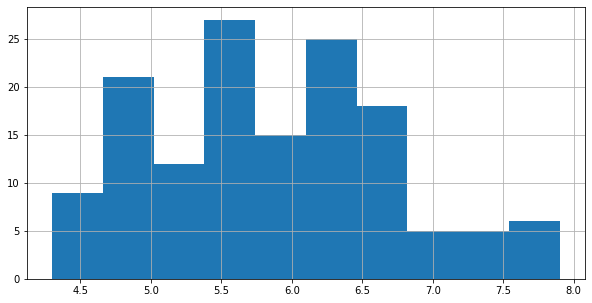

In [7]:
skewgraph = df["SL"]
skewgraph.hist(figsize=(10,5))
plt.show()

In [8]:
df["SL"]=df["SL"].fillna(df["SL"].median())

<function matplotlib.pyplot.show(close=None, block=None)>

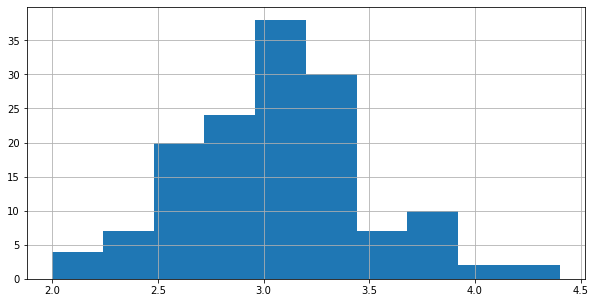

In [9]:
skewgraph = df["SW"]
skewgraph.hist(figsize=(10,5))
plt.show()

In [10]:
df["SW"]=df["SW"].fillna(df["SW"].median())

<function matplotlib.pyplot.show(close=None, block=None)>

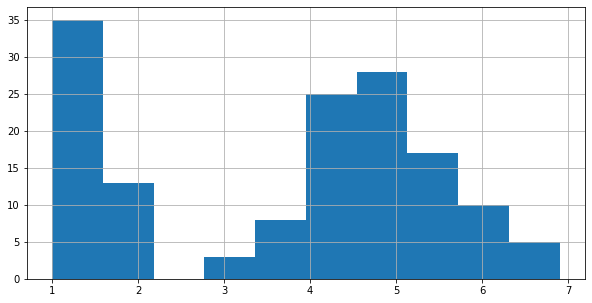

In [11]:
skewgraph = df["PL"]
skewgraph.hist(figsize=(10,5))
plt.show()

In [12]:
df["PL"]=df["PL"].fillna(df["PL"].median())

In [13]:
df.isna().sum()


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Detecting outlier values and processing it

<AxesSubplot:>

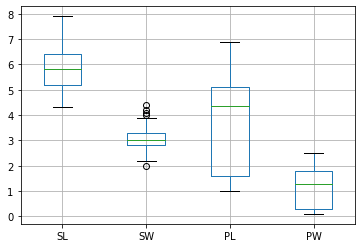

In [14]:
df.boxplot()


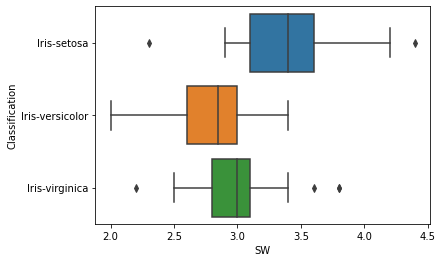

In [15]:
sns.boxplot(data=df,y="Classification",x="SW",whis=1.5)
plt.show()

In [17]:
dfClass = df.groupby("Classification")


In [18]:
import scipy.stats as stats

In [19]:
#Outlier treatment of "Iris-setosa"

Q1=dfClass.get_group("Iris-setosa")["SW"].quantile(q=.25)
Q2=dfClass.get_group("Iris-setosa")["SW"].quantile(q=.5)
Q3=dfClass.get_group("Iris-setosa")["SW"].quantile(q=.75)
IQR= Q3-Q1

lowerHand = Q1-(1.5*IQR)
higherHand = Q3+(1.5*IQR)

df.loc[(df["Classification"]=="Iris-setosa")&(df["SW"]<lowerHand),"SW"]=Q2
df.loc[(df["Classification"]=="Iris-setosa")&(df["SW"]>higherHand),"SW"]=Q2

#Outlier treatment of "Iris-virginica"

Q1=dfClass.get_group("Iris-virginica")["SW"].quantile(q=.25)
Q2=dfClass.get_group("Iris-virginica")["SW"].quantile(q=.5)
Q3=dfClass.get_group("Iris-virginica")["SW"].quantile(q=.75)
IQR= Q3-Q1

lowerHand = Q1-(1.5*IQR)
higherHand = Q3+(1.5*IQR)

df.loc[(df["Classification"]=="Iris-virginica")&(df["SW"]<lowerHand),"SW"]=Q2
df.loc[(df["Classification"]=="Iris-virginica")&(df["SW"]>higherHand),"SW"]=Q2

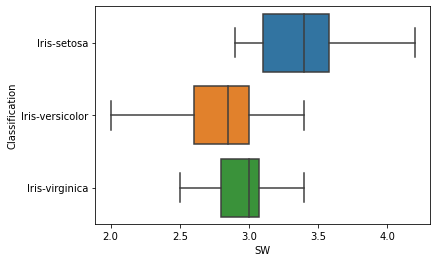

In [20]:
sns.boxplot(data=df,y="Classification",x="SW",whis=1.5)
plt.show()

### Dividing valiables to dependent and independent

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
x=df.drop("Classification",axis=1)
y=df["Classification"]

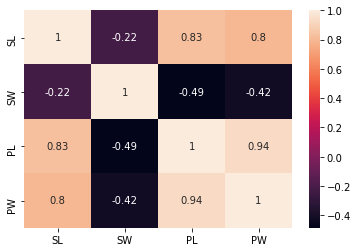

In [25]:
ax = sns.heatmap(x.corr(), annot=True)

### Splitting data for model

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_en,test_size=0.3,random_state=2)

## Modelling

### K-Nearest Neighbour Algorithm

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(n_neighbors=5)

knnClassifier.fit(x_train, y_train)

y_pred = knnClassifier.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9777777777777777


### Distribution tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

y_pred = clf_gini.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9555555555555556


In [31]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(x_train, y_train)

y_pred = clf_entropy.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9555555555555556


### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier() 
 
RFclf.fit(x_train, y_train)
 
y_pred = RFclf.predict(x_test)

In [33]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9777777777777777


## Summary
### From the above models we can see that Random Forest and KNN have high accuracy

# Feature Importance

In [34]:
pd.Series(RFclf.feature_importances_, index=x.columns).sort_values(ascending=False)

PW    0.480333
PL    0.379121
SL    0.100621
SW    0.039924
dtype: float64

#### We can see petal width is the most important factor deciding type of iris